# Multiple linear regression task 2

## Problem Statement: House Price Prediction
The real estate market in Kerala has been experiencing significant variation in housing prices due to factors such as location, property size, age, and availability of amenities. Understanding these relationships is crucial for buyers, sellers, and developers to make informed decisions.

This project aims to develop a predictive model that estimates the price of residential houses in Kerala based on key property and location features. The dataset includes attributes such as Area (sq. ft), number of Bedrooms and Bathrooms, Age of the House, Parking availability, City, and Water Source.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv(r"C:\Users\sudhin\Downloads\dataset\house_price.csv")

In [3]:
house

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455
...,...,...,...,...,...,...,...,...
220,1539.0,3,1,17.0,1,Thrissur,Corporation,3035400.833
221,1075.0,3,1,7.0,1,Trivandrum,Well,2465948.669
222,704.0,3,1,26.0,1,Kochi,Corporation,1807884.473
223,NaN,3,3,NaN,1,Kochi,Well,3089173.938


## Data cleaning processes
  1. Check duplicated datas
  2. check null valued datas

In [4]:
house.duplicated().sum()


np.int64(5)

In [5]:
house = house.drop_duplicates()

In [6]:
house.isna().sum()

Area_sqft        7
Bedrooms         0
Bathrooms        0
Age_of_House     7
Parking_Space    0
City             0
Water_Source     0
Price            0
dtype: int64

In [7]:
house = house.dropna()

In [8]:
house

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455
...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Alappuzha,Well,3343585.633
216,1190.0,3,1,25.0,0,Kozhikode,Corporation,2436806.773
217,1405.0,4,2,27.0,1,Thrissur,Borewell,2754900.572
218,1305.0,3,2,17.0,1,Kozhikode,Well,2698017.935


## Ploting graph of city v/s price

<Axes: xlabel='City', ylabel='Price'>

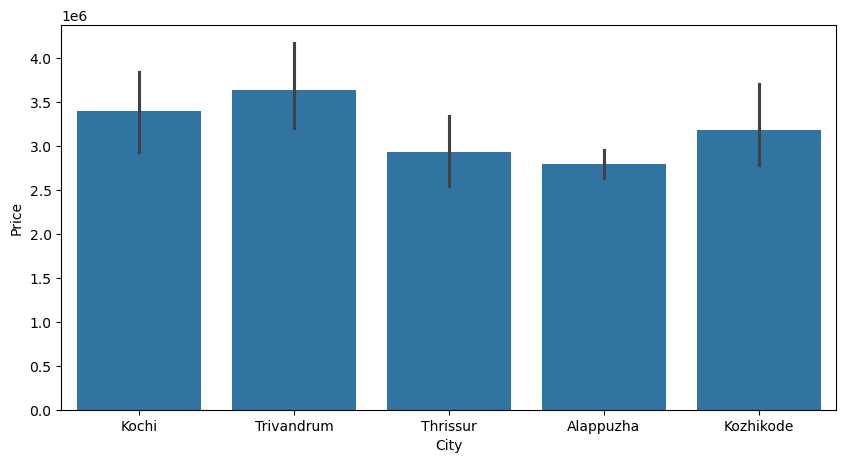

In [9]:
plt.figure(figsize =(10,5))
sns.barplot(x = house['City'] ,y = house['Price'])

## Model building

In [10]:
# from sklearn.linear_model import LinearRegression 
# from sklearn.model_selection import train_test_split

In [11]:
# house.columns

In [12]:
# y = house['Price']
# x = house[['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space',
#        'City', 'Water_Source',]]

In [13]:
# X_train ,X_test ,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
# model = LinearRegression()
# model

In [15]:
# model.fit(X_train,Y_train)

In [16]:
# house['Water_Source'].unique()

### Here city and water source are category type this model cant use category only support numerics so we need to convert it there are 3 main encoding methods
1. ordinal encoding
2. label encoding
3. one-hot encoding (Dummy variables)

- here i using label encoding for automatic encoding and also it is simple
  


# Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
house['water_source_le'] = le.fit_transform(house['Water_Source'])

In [20]:
house['city_le'] = le.fit_transform(house['City'])

In [21]:
house

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price,water_source_le,city_le
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460,1,1
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581,0,4
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020,0,1
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553,1,3
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455,2,0
...,...,...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Alappuzha,Well,3343585.633,2,0
216,1190.0,3,1,25.0,0,Kozhikode,Corporation,2436806.773,1,2
217,1405.0,4,2,27.0,1,Thrissur,Borewell,2754900.572,0,3
218,1305.0,3,2,17.0,1,Kozhikode,Well,2698017.935,2,2


## THEN BUILD MODEL

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [23]:
house.columns

Index(['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space',
       'City', 'Water_Source', 'Price', 'water_source_le', 'city_le'],
      dtype='object')

In [24]:
y = house['Price']
x = house[['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space',
       'city_le', 'water_source_le',]]

In [25]:
X_train ,X_test ,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [26]:
model = LinearRegression()
model

LinearRegression()

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
model.intercept_

np.float64(548551.1588683417)

In [29]:
model.coef_

array([   1940.7074816 , -130295.05396783,  115323.08931827,
         -5455.80917379,   23314.97982968,   85948.82356616,
       -201348.51707065])

In [30]:
Y_pred = model.predict(X_test)
Y_pred

array([3231402.52118852, 2325113.69429572, 3097199.15110907,
       2983152.82889608, 3838429.9176484 , 3950470.86959728,
       3216077.82071354, 4423754.31253515, 2420429.48629432,
       3630263.84365448, 5441573.78888736, 2934714.20404246,
       3375987.6832292 , 3134892.30454361, 3183383.06208991,
       6266759.663065  , 3387737.20527138, 3886734.57829749,
       3386073.65025586, 1405311.40113943, 1993689.71889062,
       2904744.91295043, 3571467.24630967, 4620135.71968469,
       4031289.61147363, 3592192.0062684 , 2030474.87417322,
       2541632.08842852, 2438536.61199487, 3299429.91444226,
       2449237.47659117, 3104380.9717693 , 3484030.65167471,
       5155806.69728525, 3190640.82175551, 2791701.97158178,
       3544948.88415644, 3540618.0420071 , 4611793.2172682 ,
       4238146.56241048, 4053173.59468815, 3059807.23706506])

In [31]:
predicted = pd.DataFrame({"Actual":Y_test,'Predicted':Y_pred})
predicted

,Actual,Predicted
168,2.894829e+06,3.231403e+06
15,2.381767e+06,2.325114e+06
77,2.712460e+06,3.097199e+06
101,2.475424e+06,2.983153e+06
174,3.651852e+06,3.838430e+06
9,1.177575e+07,3.950471e+06
105,3.106992e+06,3.216078e+06
141,4.593427e+06,4.423754e+06
18,2.972924e+06,2.420429e+06
154,3.360263e+06,3.630264e+06
